In [20]:
import numpy as np 
import pandas as pd 
import pylab as pl 
import matplotlib.pyplot as plt 
plt.style.use('ggplot') 
%matplotlib inline 
import seaborn as sns 
import sklearn.metrics as metrics

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('ORGANICS.csv', encoding="cp1251")

In [4]:
data = data.fillna(data.median(axis=0), axis=0)
data

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [6]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']] 
y=data.values[::,11] 
y=y.astype('int')

In [7]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

In [8]:
from sklearn.tree import DecisionTreeClassifier 

tree=DecisionTreeClassifier(max_depth=4, random_state=0) 

tree.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [17]:
pred_prob = tree.predict_proba(X_test)

In [23]:
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

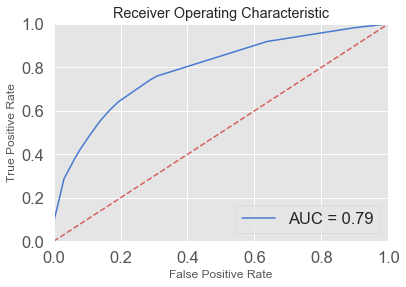

In [24]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
y_score = tree.predict(X_test)
print(metrics.accuracy_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))

0.7979601019949003
0.3786057692307692
0.6680805938494168


2

1)Рассчитать оценки на основе несбалансированных и сблансированных мер для задачи классификации Organics. Используем полную несбалансированную выборку. 